## BA 305 Final project 10 variables dataset (2)

## **Introduction**: we cut down the original dataset's 22 variables to 10 important variables base on random forest's feature importance. Then, we get a new dataset and decided to run all classification models on this new dataset again to see its performance

### It takes about **25 minutes** to run all the codes in this file
There is an time indication next to the top of the Code if it requires **more than 1 min to run**

## Form the new diabetes dataset (10 features)

In [ ]:
# Import the python packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
# Import some useful packages from scikit-learn
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier #KNN Classifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import tree

In [ ]:
# Import the dataset that we found on Kaggle
# Link of the dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
# we uploaded the CSV file on github and it is more convenient for us to import datset every time 

url = 'https://raw.githubusercontent.com/JimSong66/BA-305/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
diabetes_df = pd.read_csv(url)
diabetes_df.head(10)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   
5              0.0     0.0       0.0        1.0  18.0     0.0     0.0   
6              0.0     0.0       1.0        1.0  26.0     1.0     0.0   
7              0.0     0.0       0.0        1.0  31.0     1.0     0.0   
8              0.0     0.0       0.0        1.0  32.0     0.0     0.0   
9              0.0     0.0       0.0        1.0  27.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   
5                   0.0           1.0     1.0  ...            0.0   
6                   0.0           1.0     1.0  ...            1.0   
7                   0.0           0.0     1.0  ...            1.0   
8                   0.0           1.0     1.0  ...            1.0   
9                   0.0           0.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   
1          0.0      3.0       0.0       0.0       0.0  1.0  12.0        6.0   
2          0.0      1.0       0.0      10.0       0.0  1.0  13.0        6.0   
3          0.0      3.0       0.0       3.0       0.0  1.0  11.0        6.0   
4          0.0      2.0       0.0       0.0       0.0  0.0   8.0        5.0   
5          0.0      2.0       7.0       0.0       0.0  0.0   1.0        4.0   
6          0.0      1.0       0.0       0.0       0.0  1.0  13.0        5.0   
7          0.0      4.0       0.0       0.0       0.0  1.0   6.0        4.0   
8          0.0      3.0       0.0       0.0       0.0  0.0   3.0        6.0   
9          0.0      3.0       0.0       6.0       0.0  1.0   6.0        4.0   

   Income  
0     8.0  
1     8.0  
2     8.0  
3     8.0  
4     8.0  
5     7.0  
6     6.0  
7     3.0  
8     8.0  
9     4.0  

[10 rows x 22 columns]

In [ ]:
# get rid of the space within each column's name
diabetes_df.columns = ('Diabetes_binary','HighBP',	'HighChol',	'CholCheck',	'BMI',	'Smoker',	'Stroke',	'HeartDiseaseorAttack',	'PhysActivity',
                       'Fruits',	'Veggies',	'HvyAlcoholConsump',	'AnyHealthcare',	'NoDocbcCost',	'GenHlth',	'MentHlth',	'PhysHlth',	'DiffWalk',	'Sex',	'Age',	'Education',	'Income')

In [ ]:
# first create a list of all the columns to be dropped
dropcols = ['CholCheck',	'Smoker',	'Stroke',		
                       'Fruits',	'Veggies',	'HvyAlcoholConsump',	'AnyHealthcare', 'PhysActivity','NoDocbcCost','MentHlth', 'Sex','Education']
# then use the dataframe drop() command to drop them
diabetes9_df = diabetes_df.drop(dropcols, axis =1)
diabetes9_df.head()

Diabetes_binary  HighBP  HighChol   BMI  HeartDiseaseorAttack  GenHlth  \
0              0.0     1.0       0.0  26.0                   0.0      3.0   
1              0.0     1.0       1.0  26.0                   0.0      3.0   
2              0.0     0.0       0.0  26.0                   0.0      1.0   
3              0.0     1.0       1.0  28.0                   0.0      3.0   
4              0.0     0.0       0.0  29.0                   0.0      2.0   

   PhysHlth  DiffWalk   Age  Income  
0      30.0       0.0   4.0     8.0  
1       0.0       0.0  12.0     8.0  
2      10.0       0.0  13.0     8.0  
3       3.0       0.0  11.0     8.0  
4       0.0       0.0   8.0     8.0

## KNN Model on the new dataste


In [ ]:
# Define independent variables and the dependent variable
X9 = diabetes9_df[['HighBP','HighChol','BMI','HeartDiseaseorAttack', 'GenHlth','PhysHlth','DiffWalk','Age','Income']].values  
y9 = diabetes9_df['Diabetes_binary'].values

In [ ]:
# Use train/test split function to split the 10 variavles dataset into train and testing sets
train9_df, test9_df = train_test_split(diabetes9_df, test_size=0.3, random_state=2, stratify=y9)
print('Training set:', train9_df.shape, 'Testing set:', test9_df.shape)

Training set: (49484, 10) Testing set: (21208, 10)


Training set: (49484, 10) Testing set: (21208, 10)

In [ ]:
# the list of X
predictors = ['HighBP','HighChol','BMI','HeartDiseaseorAttack', 'GenHlth','PhysHlth','DiffWalk','Age','Income']

In [ ]:
# naming the testing and training output variable
y9_train = train9_df['Diabetes_binary'].values
y9_test = test9_df['Diabetes_binary'].values

In [ ]:
# Standardize training and validation features using 'StandardScaler()'

scaler = preprocessing.StandardScaler()
scaler.fit(train9_df[predictors])

X9_train = scaler.transform(train9_df[predictors])
X9_test = scaler.transform(test9_df[predictors])

## **The code below takes about 3.5 mins to run!**





In [ ]:
# Take about 3 mins 
results = []
for k in range(1, 500, 20):

    print('iteration', k, "of", 500)
    knn = KNeighborsClassifier(n_neighbors=k).fit(X9_train, y9_train)
    
    # create a dictionary to store the results
    results.append({
        'k': k,
        'accuracy': accuracy_score(y9_test, knn.predict(X9_test))
        })

# convert results to a pandas dataframe for better visualization
results_df = pd.DataFrame(results)
results_df

iteration 1 of 500
iteration 21 of 500
iteration 41 of 500
iteration 61 of 500
iteration 81 of 500
iteration 101 of 500
iteration 121 of 500
iteration 141 of 500
iteration 161 of 500
iteration 181 of 500
iteration 201 of 500
iteration 221 of 500
iteration 241 of 500
iteration 261 of 500
iteration 281 of 500
iteration 301 of 500
iteration 321 of 500
iteration 341 of 500
iteration 361 of 500
iteration 381 of 500
iteration 401 of 500
iteration 421 of 500
iteration 441 of 500
iteration 461 of 500
iteration 481 of 500


k  accuracy
0     1  0.665504
1    21  0.739296
2    41  0.745285
3    61  0.745851
4    81  0.744813
5   101  0.745568
6   121  0.745568
7   141  0.745521
8   161  0.745002
9   181  0.745002
10  201  0.744389
11  221  0.745049
12  241  0.745238
13  261  0.744578
14  281  0.744247
15  301  0.744342
16  321  0.744012
17  341  0.744719
18  361  0.744153
19  381  0.743352
20  401  0.743446
21  421  0.743163
22  441  0.742691
23  461  0.743304
24  481  0.743634

When k is 61, the highest accuracy score is 0.745851.

## **The code below takes about 1 min.**

In [ ]:
# narrow down the range to find the best k (Take about 1 min)
results = []
for k in range(41, 66, 2):
   
    knn = KNeighborsClassifier(n_neighbors=k).fit(X9_train, y9_train)
    
    # create a dictionary to store the results
    results.append({
        'k': k,
        'accuracy': accuracy_score(y9_test, knn.predict(X9_test))
        })

# convert results to a pandas dataframe for better visualization
results_df = pd.DataFrame(results)
results_df

k  accuracy
0   41  0.745285
1   43  0.743870
2   45  0.744955
3   47  0.743870
4   49  0.743352
5   51  0.744908
6   53  0.745709
7   55  0.745426
8   57  0.745992
9   59  0.745426
10  61  0.745851
11  63  0.744955
12  65  0.745238

k = 57, accuracy score = 0.745992

In [ ]:
# Take about 40 seconds
# re-run the for-loop again to find the optimal K
results = []
for k in range(55, 63, 1):
    print('iteration', k-54, "of", 8)
    knn = KNeighborsClassifier(n_neighbors=k).fit(X9_train, y9_train)
    
    # create a dictionary to store the results
    results.append({
        'k': k,
        'accuracy': accuracy_score(y9_test, knn.predict(X9_test))
        })

# convert results to a pandas dataframe for better visualization
results_df = pd.DataFrame(results)
results_df

iteration 1 of 8
iteration 2 of 8
iteration 3 of 8
iteration 4 of 8
iteration 5 of 8
iteration 6 of 8
iteration 7 of 8
iteration 8 of 8


k  accuracy
0  55  0.745426
1  56  0.744813
2  57  0.745992
3  58  0.746369
4  59  0.745426
5  60  0.745049
6  61  0.745851
7  62  0.746605

When k equals 62, it has the highest accuracy score of 0.746605.

Accuracy: 0.7466

In [ ]:
# Show the confusion matrix and accuracy for the validation data, using k = 62 (optimal k value we found in previous step)
knn = KNeighborsClassifier(n_neighbors=62)
knn.fit(X9_train, y9_train)

y9_knnpred = knn.predict(X9_test)

# To see the model performance by computing the accuracy score
print(confusion_matrix(y9_test, y9_knnpred))
print('Accuracy Score:', accuracy_score(y9_test, y9_knnpred))
print(classification_report(y9_test,y9_knnpred))

[[7451 3153]
 [2221 8383]]
Accuracy Score: 0.746605054696341
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     10604
         1.0       0.73      0.79      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



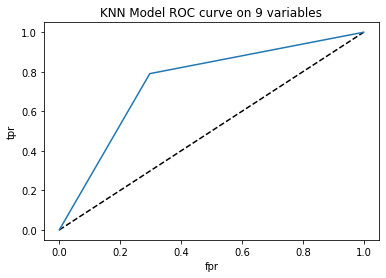

In [ ]:
# extract roc curve values
fpr, tpr, thresholds = roc_curve(y9_test, y9_knnpred)

# plot roc curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN Model ROC curve on 9 variables')
plt.show()

## Decision Tree Model

In [ ]:
# Build "Full Tree"
full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X9_train,y9_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Get the number of nodes for the full tree
print('Number of nodes', full_clf.tree_.node_count)

Number of nodes 30979


Number of nodes 30979

## Decision Tree - Pruning the full tree

## **The code below takes about 3 mins to run!**

In [ ]:
# We create lists of all the values we want to search over (Take about 3 mins)

# This is called 'creating a grid'
param_grid = {
    'max_depth': [ 4, 6, 8,10], 
    'min_samples_leaf': [120,150,160,170,180,190,200],
    'min_impurity_decrease': [0,0.0005,0.0001,0.001,0.002], 
    'min_samples_split': [4,5,6,7,8,10],
}

# Then, use the GridSearchCV function which combines gridsearch with 
# K-fold cross validation (cv parameter)
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring = 'accuracy')
gridSearch.fit(X9_train, y9_train)

print('Best accuracy: ', gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)

Best accuracy:  0.7399966869752795
Parameter values to achieve best accuracy:  {'max_depth': 10, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 150, 'min_samples_split': 4}


Best accuracy:  0.7399966869752795
Parameter values to achieve best accuracy:  {'max_depth': 10, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 150, 'min_samples_split': 4}

In [ ]:
# Use the optimal parameters to run decision tree (pruned Tress)
# The parameters:
# max_depth : maximum number of splits
# min_samples_split :  The minimum number of samples required to split a node
# min_samples_leaf : Minimum # of samples inside of every leaf
# min_impurity_decrease : minimum absolute 'error' improvement to justify a split
# criterion : gini (default) or entropy

clf = DecisionTreeClassifier(
      max_depth=10, 
      min_samples_split = 4, 
      min_samples_leaf = 150,
      min_impurity_decrease = 0.0001,
      criterion = 'gini')
clf.fit(X9_train, y9_train)

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=150, min_samples_split=4)

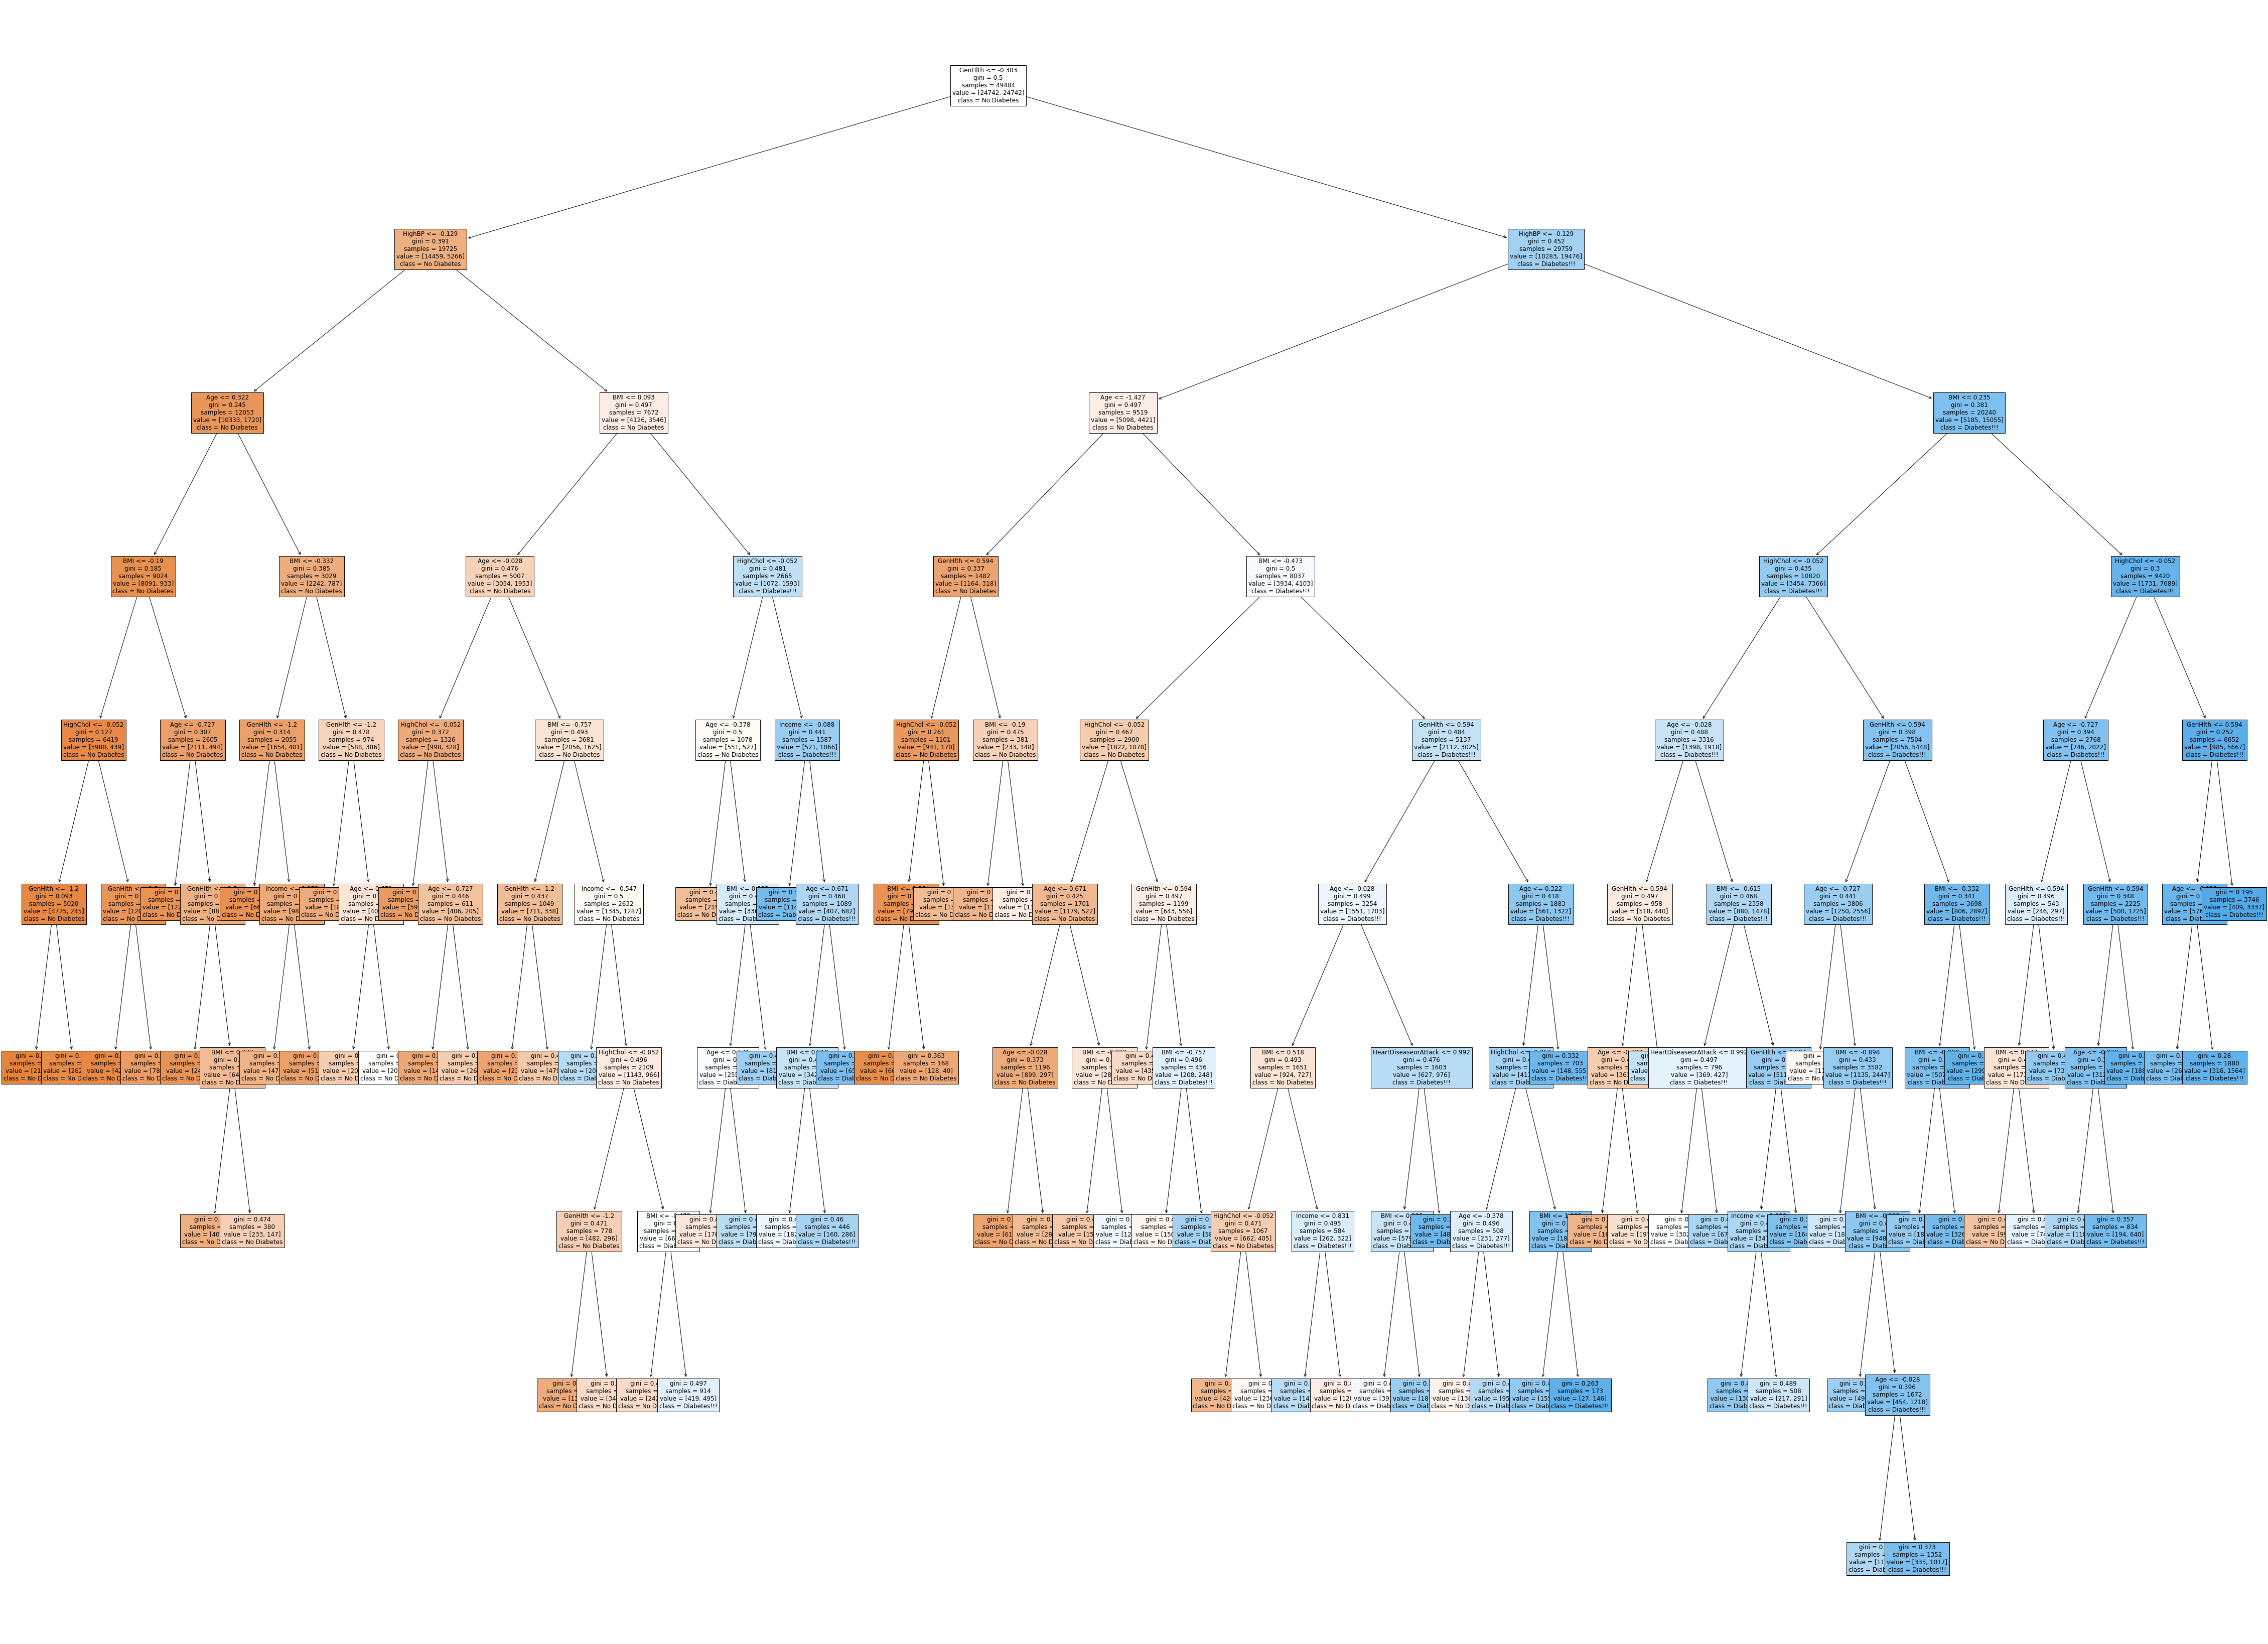

In [ ]:
# Plot the reduced tree
fig = plt.figure(figsize=(80,60))
# define class names
#we are passing numpy array (X) which is not a dataframe and therefore, no attribute as columns

cnames = ['No Diabetes','Diabetes!!!'] 
tree.plot_tree(clf, fontsize=12,feature_names= predictors, class_names=cnames, filled=True);

## Visualize the tree in a better way

In [ ]:
# import the packages for better visualization
%%capture
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

In [ ]:
# Plot the decision tree in a better way
viz = dtreeviz(clf, 
               x_data=X9_train,
               y_data=y9_train,
               target_name='Diabetes?',
               feature_names= predictors, 
               class_names=['No Diabetes', 'Diabetes!!!'],
               title="Decision Tree on Diabetes Survey",
               scale=1.2); 
viz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont:

## Random Forest

In [ ]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Run the RF classifier, specifying the number of trees to generate (Take about 2mins )
# when using random forest classifiers, given they randomize over the data and the feature columns
rf = RandomForestClassifier(
    n_estimators=5000, 
    random_state=0, 
    criterion='gini', 
    min_samples_leaf = 150)
rf.fit(X9_train, y9_train)

RandomForestClassifier(min_samples_leaf=150, n_estimators=5000, random_state=0)

In [ ]:
# The accuracy score, the confusion_matrix and the classification report on the random forest model
print(accuracy_score(y9_test, rf.predict(X9_test)))
print(confusion_matrix(y9_test, rf.predict(X9_test)))
print(classification_report(y9_test,rf.predict(X9_test)))

0.7467936627687665
[[7470 3134]
 [2236 8368]]
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74     10604
         1.0       0.73      0.79      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



accuracy : 0.7468

## Logistics Regression

In [ ]:
#importing required packages for Logistic Regression
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [ ]:
# Call Logistic Regression function
lr = LogisticRegression(penalty="none", solver='lbfgs')
lr.fit(X9_train, y9_train)

LogisticRegression(penalty='none')

In [ ]:
# Run class y predictions
y9_lrpred = lr.predict(X9_test)

In [ ]:
# Confusion Matrix, accuracy score
print(confusion_matrix(y9_test,y9_lrpred))
print(accuracy_score(y9_test, y9_lrpred))
print(classification_report(y9_test,y9_lrpred))

[[7690 2914]
 [2546 8058]]
0.7425499811391928
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74     10604
         1.0       0.73      0.76      0.75     10604

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



accuracy: 0.7425

In [ ]:
# change the default probability cutoff of 0.5
# Extract regressed probabilities using predict_proba
p_pred=lr.predict_proba(X9_test)[:,1]
np.round(p_pred,3)

array([0.114, 0.142, 0.818, ..., 0.451, 0.039, 0.191])

In [ ]:
# Try out different cutoff values to see which cutoff value gives the highest accuracy score
for cutoff in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  p_pred_new=[1 if i > cutoff else 0 for i in p_pred]
  print('Cutoff value:',cutoff,'Accuracy Score:', accuracy_score(y9_test, p_pred_new))

Cutoff value: 0.1 Accuracy Score: 0.588032817804602
Cutoff value: 0.2 Accuracy Score: 0.6731893625047152
Cutoff value: 0.3 Accuracy Score: 0.7193040362127499
Cutoff value: 0.4 Accuracy Score: 0.740192380233874
Cutoff value: 0.5 Accuracy Score: 0.7425499811391928
Cutoff value: 0.6 Accuracy Score: 0.7248679743493022
Cutoff value: 0.7 Accuracy Score: 0.6845529988683515
Cutoff value: 0.8 Accuracy Score: 0.6266031686156167
Cutoff value: 0.9 Accuracy Score: 0.5482365145228216


cutoff value of 0.5 has the highest accuracy value at 0.7425.

## Interpreting logistics regression results


In [ ]:
# Store coefficients
lr_int = lr.intercept_[0]
lr_coef = lr.coef_[0]

# print coefficients
print('intercept ', lr_int)
print(pd.DataFrame({'coeff': lr_coef}, index=predictors))

intercept  -0.02466351519169692
                         coeff
HighBP                0.366708
HighChol              0.301422
BMI                   0.564734
HeartDiseaseorAttack  0.114709
GenHlth               0.664964
PhysHlth             -0.093877
DiffWalk              0.031795
Age                   0.450591
Income               -0.135128


Text(0.5, 0, 'Importance')

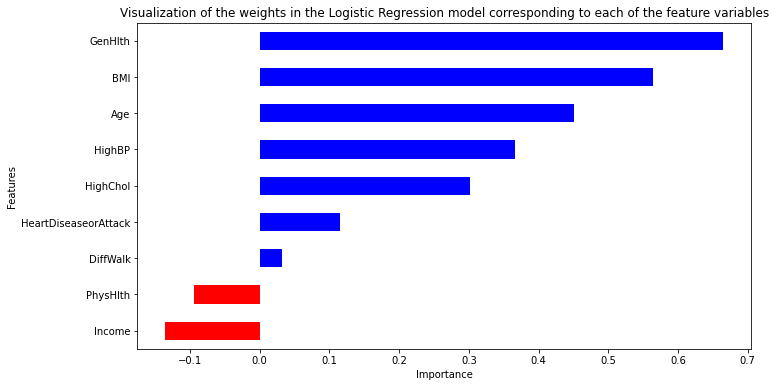

In [ ]:
# To see the weights in the Logistic Regression model corresponding to each of the feature variables
features = pd.DataFrame()
features['Features'] = predictors
features['importance'] = lr_coef
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),title= 'Visualization of the weights in the Logistic Regression model corresponding to each of the feature variables', color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [ ]:
# print exponentiated variables coefficients
for i in range(0, 9, 1):
    print( math.exp(lr_coef[i]))

1.4429769911458172
1.3517794404717511
1.7589806469877713
1.12154689877447
1.944420177217934
0.9103945263795735
1.032306210163792
1.569239144618054
0.8736044323552842


In the logistics model, the estimated coefficient for GenHlth is 0.6650. In the odds models, the coefficient is e^0.6650 = 1.9444. This means that an increase of a unit in GenHlth is associated with an increase in the odds of diagnosis of diabetes by a factor of 1.9444. Conversely, and extra unit of income decreases the odds of diagnosis of diabetes by a factor of 0.8736.

## Neural Network

In [ ]:
# import required packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor 

In [ ]:
# see the dataset head()
diabetes9_df.head()

Diabetes_binary  HighBP  HighChol   BMI  HeartDiseaseorAttack  GenHlth  \
0              0.0     1.0       0.0  26.0                   0.0      3.0   
1              0.0     1.0       1.0  26.0                   0.0      3.0   
2              0.0     0.0       0.0  26.0                   0.0      1.0   
3              0.0     1.0       1.0  28.0                   0.0      3.0   
4              0.0     0.0       0.0  29.0                   0.0      2.0   

   PhysHlth  DiffWalk   Age  Income  
0      30.0       0.0   4.0     8.0  
1       0.0       0.0  12.0     8.0  
2      10.0       0.0  13.0     8.0  
3       3.0       0.0  11.0     8.0  
4       0.0       0.0   8.0     8.0

In [ ]:
# Divide the entire dataset into X and y
y9_nonscaled = diabetes9_df[['Diabetes_binary']]
X9_nonscaled = diabetes9_df[predictors]
X9_nonscaled.head()

HighBP  HighChol   BMI  HeartDiseaseorAttack  GenHlth  PhysHlth  DiffWalk  \
0     1.0       0.0  26.0                   0.0      3.0      30.0       0.0   
1     1.0       1.0  26.0                   0.0      3.0       0.0       0.0   
2     0.0       0.0  26.0                   0.0      1.0      10.0       0.0   
3     1.0       1.0  28.0                   0.0      3.0       3.0       0.0   
4     0.0       0.0  29.0                   0.0      2.0       0.0       0.0   

    Age  Income  
0   4.0     8.0  
1  12.0     8.0  
2  13.0     8.0  
3  11.0     8.0  
4   8.0     8.0

In [ ]:
# normalize the data into [0,1] range
# MinMax = (X - Xmin) / (Xmax - Xmin)
# X2, y2 are for nerual network model
scaleOutput = MinMaxScaler()
scaleInput = MinMaxScaler()

y9_scaled = scaleOutput.fit_transform(y9_nonscaled)
X9_scaled = scaleInput.fit_transform(X9_nonscaled)

# partition data
# Xn, yn are the representation of train/split dataset for neural network classification
X9_scaled_train, X9_scaled_valid, y9_scaled_train, y9_scaled_valid = train_test_split(X9_scaled, y9_scaled, test_size=0.3, random_state=1)

In [ ]:
# Check normalization worked, everything should be between 0 and 1.
X9_scaled_train[0,:]

array([0.        , 0.        , 0.13953488, 0.        , 0.25      ,
       0.        , 0.        , 0.66666667, 0.85714286])

### Neural Network with a single hidden layer and 2 nodes

In [ ]:
# Use the MLPRegressor to run the neural network model
diabetes9_nnet = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1, max_iter=1000)
diabetes9_nnet.fit(X9_scaled_train, y9_scaled_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=2, max_iter=1000,
             random_state=1, solver='lbfgs')

In [ ]:
# Make diabetes binary predictions
# We don't need the inverse_transform function since all inputs are categorical
ynn_pred9 = diabetes9_nnet.predict(X9_scaled_valid)
ynn_pred9

array([0.07307903, 0.55907943, 0.34178452, ..., 0.35617538, 0.48643185,
       0.79824985])

In [ ]:
# manually set the cut-off value as 0.5
cutoff = 0.5
ynn_pred9_new=[1 if i > cutoff else 0 for i in ynn_pred9]

In [ ]:
# confusion matrix with different cutoff
print(confusion_matrix(y9_scaled_valid,ynn_pred9_new))
# accuracy score with different cutoff
print(accuracy_score(y9_scaled_valid, ynn_pred9_new))

[[7485 3196]
 [2171 8356]]
0.7469351188230856


Accuracy score: 0.7469

In [ ]:
# Try out different cutoff values to see which cutoff value gives the highest accuracy score
# 0.5 is the best cutoff value

for z in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  ynn_pred9_new=[1 if i > z else 0 for i in ynn_pred9]
  print('Cutoff value:',z,'Accuracy Score:', accuracy_score(y9_scaled_valid, ynn_pred9_new))


Cutoff value: 0.1 Accuracy Score: 0.610665786495662
Cutoff value: 0.2 Accuracy Score: 0.6757355714824594
Cutoff value: 0.3 Accuracy Score: 0.7173708034703885
Cutoff value: 0.4 Accuracy Score: 0.7396737080347039
Cutoff value: 0.5 Accuracy Score: 0.7469351188230856
Cutoff value: 0.6 Accuracy Score: 0.7408996605054696
Cutoff value: 0.7 Accuracy Score: 0.7005846850245191
Cutoff value: 0.8 Accuracy Score: 0.6220765748774048
Cutoff value: 0.9 Accuracy Score: 0.5037250094304037


0.5 is the best cut-off value.

### Neural Network with a single hidden layer and 5 nodes

In [ ]:
# train neural network with single hidden layer and 5 hidden nodes
diabetes9_nnet1 = MLPRegressor(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', random_state=1)
diabetes9_nnet1.fit(X9_scaled_train, y9_scaled_train)

# Make diabetes binary predictions
ynn_pred9_1 = diabetes9_nnet1.predict(X9_scaled_valid)

# test out different cut-off value to find the optimal one
for z in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  ynn_pred9_1_new=[1 if i > z else 0 for i in ynn_pred9_1]
  print('Cutoff value:',z,'Accuracy Score:', accuracy_score(y9_scaled_valid, ynn_pred9_1_new))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cutoff value: 0.1 Accuracy Score: 0.6204262542436816
Cutoff value: 0.2 Accuracy Score: 0.6788476046774802
Cutoff value: 0.3 Accuracy Score: 0.7176537155790268
Cutoff value: 0.4 Accuracy Score: 0.7416540927951716
Cutoff value: 0.5 Accuracy Score: 0.7512259524707657
Cutoff value: 0.6 Accuracy Score: 0.7442003017729159
Cutoff value: 0.7 Accuracy Score: 0.69667106752169
Cutoff value: 0.8 Accuracy Score: 0.617078460958129
Cutoff value: 0.9 Accuracy Score: 0.5312146359864203


cutoff value of 0.5 has the highest accuracy score of 0.7512.

In [ ]:
# set the cut-off value as 0.5 since it is the best one
cutoff = 0.5
ynn_pred9_1_new=[1 if i > cutoff else 0 for i in ynn_pred9_1]

print(confusion_matrix(y9_scaled_valid,ynn_pred9_1_new));
print(accuracy_score(y9_scaled_valid, ynn_pred9_1_new));

[[7440 3241]
 [2035 8492]]
0.7512259524707657


### Neural Network with 3 hidden layer and 5 nodes (Deep Learning)

In [ ]:
# train neural network with single hidden layer and 5 hidden nodes
diabetes9_nnet2 = MLPRegressor(hidden_layer_sizes=(5,5,5), activation='logistic', solver='lbfgs', random_state=1)
diabetes9_nnet2.fit(X9_scaled_train, y9_scaled_train)

# Make diabetes binary predictions
ynn555_pred9 = diabetes9_nnet2.predict(X9_scaled_valid)

# Test out different cut-off value 
for z in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  ynn555_pred9_new=[1 if i > z else 0 for i in ynn555_pred9]
  print('Cutoff value:',z,'Accuracy Score:', accuracy_score(y9_scaled_valid, ynn555_pred9_new))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cutoff value: 0.1 Accuracy Score: 0.6222180309317239
Cutoff value: 0.2 Accuracy Score: 0.6826669181440965
Cutoff value: 0.3 Accuracy Score: 0.7177008675971331
Cutoff value: 0.4 Accuracy Score: 0.739060731799321
Cutoff value: 0.5 Accuracy Score: 0.748491135420596
Cutoff value: 0.6 Accuracy Score: 0.7416069407770652
Cutoff value: 0.7 Accuracy Score: 0.697944172010562
Cutoff value: 0.8 Accuracy Score: 0.6118445869483213
Cutoff value: 0.9 Accuracy Score: 0.5197095435684648


When the cutoff value is 0.5, it has the highest accuracy of 0.7485.

In [ ]:
# Set up the cutoff value and convert all numerical predicted outputs to categorical outputs
cutoff = 0.5
ynn555_pred9_new=[1 if i > cutoff else 0 for i in ynn555_pred9]

# get the confusion martix and accuracy score
print(confusion_matrix(y9_scaled_valid,ynn555_pred9_new));
print(accuracy_score(y9_scaled_valid, ynn555_pred9_new));

[[7374 3307]
 [2027 8500]]
0.748491135420596


## Support Vector Machine (SVM)




## **The code below takes about 2 mins to run.**

In [ ]:
# import the SVM model from Sklearn (Take about 2 mins)
from sklearn.svm import SVC

# Call the SVM function and fit the data
svc_model = SVC()
svc_model.fit(X9_train, y9_train)

SVC()

# **The code below takes about 1 min to run.**

In [ ]:
# The accuracy score, confusion matrix and classification report on SVM model (Take about 1 mins)
svc_pred9 = svc_model.predict(X9_test)
print(accuracy_score(y9_test, svc_pred9))
print(confusion_matrix(y9_test, svc_pred9))
print(classification_report(y9_test, svc_pred9))

0.7460392304790645
[[7321 3283]
 [2103 8501]]
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73     10604
         1.0       0.72      0.80      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



# Classification Models performance

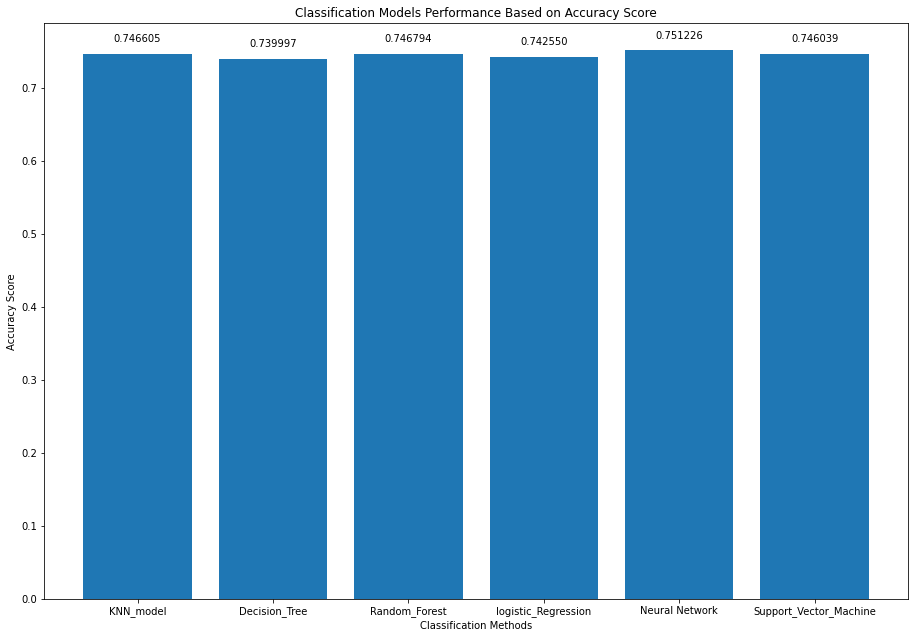

In [ ]:
# Plot the bar graphs of all classification models performance
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
langs = ['KNN_model', 'Decision_Tree', 'Random_Forest', 'logistic_Regression','Neural Network', 'Support_Vector_Machine']
result = [0.746605054696341,0.7399966869752795,0.7467936627687665, 0.7425499811391928, 0.7512259524707657, 0.7460392304790645]
ax.bar(langs,result)
ax.set_ylabel('Accuracy Score');
ax.set_xlabel('Classification Methods');
ax.set_title('Classification Models Performance Based on Accuracy Score');

def add_value_labels(ax, spacing=10):
    
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:2f}".format(y_value)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),         
            textcoords="offset points", 
            ha='center',                
            va=va)  
add_value_labels(ax)
plt.show()